In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append("..")
from utility import utility as util

In [2]:
percs = [0, 25, 50, 100]
starttime_min = pd.to_datetime("2000-01-01 00:00:00")
timestep = 60*60
save = False

In [3]:
l_gdf_bids = []
for perc in percs:
    bid_tens = util.load_result(f"../bids_no_solar_2019/{perc}_perc/bid_sample_path_{perc}_perc")
    print(f"\n{perc=}")
    print(f"{len(bid_tens)=}")
    print(f"{len(bid_tens[0])=}")
    print(f"{len(bid_tens[0][0])=}")
    print(f"{type(bid_tens)=}")
    print(f"{type(bid_tens[0])=}")
    print(f"{type(bid_tens[0][0])=}")
    
    bids_lst = []
    for d, day in enumerate(bid_tens):
        for r, run in enumerate(day):
            for h, value in enumerate(run):
                bids_lst.append([d, r, h, value])

    df_bids = pd.DataFrame(bids_lst, columns = ["day", "run", "hour", "value"])
    gdf_bids = df_bids.groupby(by = ["day", "hour"]).agg(value = ("value", "mean")).reset_index()
    print(f"{len(df_bids)=}")
    print(f"{len(gdf_bids)=}")

    gdf_bids["abs_sec"] = gdf_bids["day"] * 60 * 60 * 24 + gdf_bids["hour"] * 60 * 60
    gdf_bids["t_delta"] = pd.to_timedelta(gdf_bids["abs_sec"], unit = "S")
    gdf_bids["datetime"] = pd.to_datetime("2019-01-01") + gdf_bids["t_delta"]
    gdf_bids["ts"] = np.floor((gdf_bids["datetime"] - starttime_min).dt.total_seconds() / timestep)

    l_gdf_bids.append(gdf_bids)

    if save:
        gdf_bids[["datetime", "ts", "value"]].to_csv(f"data/df_da_bids_{perc}_perc.csv", index=False)


perc=0
len(bid_tens)=365
len(bid_tens[0])=100
len(bid_tens[0][0])=24
type(bid_tens)=<class 'list'>
type(bid_tens[0])=<class 'list'>
type(bid_tens[0][0])=<class 'numpy.ndarray'>
len(df_bids)=876000
len(gdf_bids)=8760

perc=25
len(bid_tens)=365
len(bid_tens[0])=100
len(bid_tens[0][0])=24
type(bid_tens)=<class 'list'>
type(bid_tens[0])=<class 'list'>
type(bid_tens[0][0])=<class 'numpy.ndarray'>
len(df_bids)=876000
len(gdf_bids)=8760

perc=50
len(bid_tens)=365
len(bid_tens[0])=100
len(bid_tens[0][0])=24
type(bid_tens)=<class 'list'>
type(bid_tens[0])=<class 'list'>
type(bid_tens[0][0])=<class 'numpy.ndarray'>
len(df_bids)=876000
len(gdf_bids)=8760

perc=100
len(bid_tens)=365
len(bid_tens[0])=100
len(bid_tens[0][0])=24
type(bid_tens)=<class 'list'>
type(bid_tens[0])=<class 'list'>
type(bid_tens[0][0])=<class 'numpy.ndarray'>
len(df_bids)=876000
len(gdf_bids)=8760


In [4]:
gdf_bids[["datetime", "ts", "value"]].describe(datetime_is_numeric = True)

,datetime,ts,value
count,8760,8760.000000,8760.000000
mean,2019-07-02 11:30:00,170939.500000,9.492134
min,2019-01-01 00:00:00,166560.000000,-110.769999
25%,2019-04-02 05:45:00,168749.750000,0.000000
50%,2019-07-02 11:30:00,170939.500000,0.000000
75%,2019-10-01 17:15:00,173129.250000,34.540000
max,2019-12-31 23:00:00,175319.000000,122.760000
std,NaN,2528.938512,33.813397


## Plot bids

In [5]:
import matplotlib.pyplot as plt

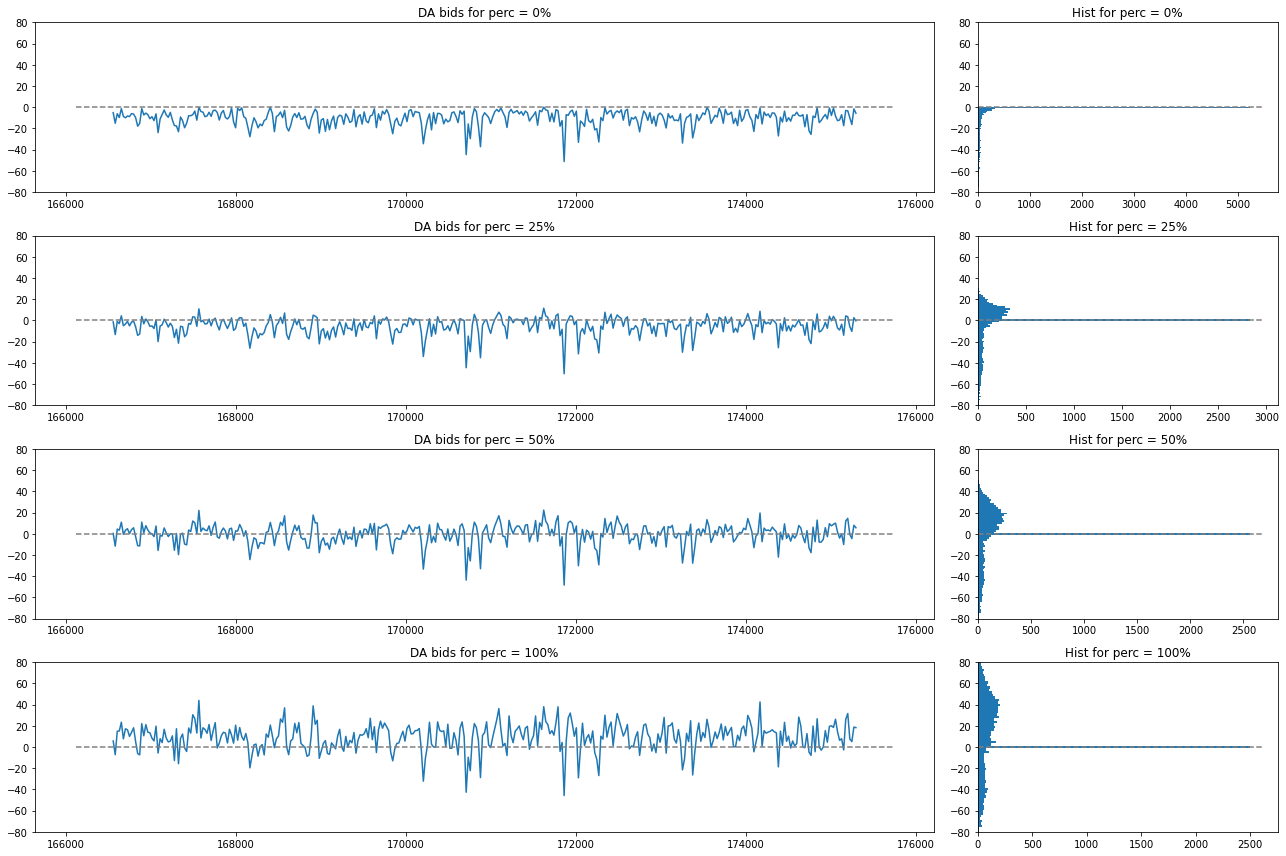

In [6]:
fig1 = plt.figure(figsize = (18, 12))
axs = fig1.subplots(len(percs), 2, gridspec_kw={'width_ratios': [3, 1]})
n = 24
    
for i, perc in enumerate(percs):
    p_df_bids = l_gdf_bids[i]
    p_df_bids["bin_ts"] = (p_df_bids["ts"] // n) * n
    gp_df_bids = p_df_bids.groupby(by = ["bin_ts"]).agg(value = ("value", "mean")).reset_index()

    axs[i, 0].plot(gp_df_bids["bin_ts"], gp_df_bids["value"])
    axs[i, 1].hist(p_df_bids["value"], bins = 100, orientation="horizontal")
    xlims1 = axs[i, 0].get_xlim()
    xlims2 = axs[i, 1].get_xlim()
    axs[i, 0].hlines(0, xlims1[0], xlims1[1], color = "grey", ls = "--")
    axs[i, 1].hlines(0, xlims2[0], xlims2[1], color = "grey", ls = "--")
    axs[i, 0].set_title(f"DA bids for perc = {perc}%")
    axs[i, 1].set_title(f"Hist for perc = {perc}%")
    axs[i, 0].set_ylim(-80, 80)
    axs[i, 1].set_ylim(-80, 80)
fig1.tight_layout()
